### PLANT DISEASE CLASSIFICATION & CURE PREDICTION USING CONVOLUTIONAL NEURAL NETWORK (CNN)

#### PROJECT BY ~ ALAISSA SHAIKH

##### The early detection and prevention of plant diseases are crucial for increasing agricultural yield and preventing economic losses.  
##### This project focuses on using deep learning techniques to automatically classify plant diseases from leaf images. 
##### I have trained a CNN model to classify images into multiple categories, such as healthy plants and those affected by diseases. 
##### Additionally, the project provide prevention and cure suggestions based on the predicted disease.

##### STEP 1: IMPORTING REQUIRED LIBRARIES

In [55]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

##### STEP 2: READING DATASET

In [29]:
# Define the path to the uploaded zip file
zip_file_path = 'plant_data.zip'  # Update with the correct file path
extract_dir = 'Desktop/DESPU/plant'  # Directory where you want to extract the files

In [31]:
# Create the extract directory if it doesn't exist
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

In [33]:
# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print(f"Files extracted to: {extract_dir}")

In [35]:
# Load the CSV
prevention_cure_df = pd.read_csv('plant_diseases_with_prevention_and_cure.csv')

In [37]:
prevention_cure_df.head(10)

,Plant Name,Disease,Disease Prevention,Cure
0,Corn (maize),healthy,Ensure optimal growing conditions such as prop...,No cure needed as the plant is already healthy...
1,Potato,healthy,Ensure optimal growing conditions such as prop...,No cure needed as the plant is already healthy...
2,"Pepper, bell",healthy,Ensure optimal growing conditions such as prop...,No cure needed as the plant is already healthy...
3,Corn (maize),Common rust,Plant rust-resistant varieties and practice cr...,Use fungicides such as those containing copper...
4,Peach,Bacterial spot,Avoid overhead irrigation to keep foliage dry....,Apply copper-based fungicides during early sta...
5,Corn (maize),Northern Leaf Blight,Use hybrid varieties that are resistant to Nor...,Apply fungicides like mancozeb or azoxystrobin...
6,Strawberry,healthy,Ensure optimal growing conditions such as prop...,No cure needed as the plant is already healthy...
7,Orange,Haunglongbing (Citrus greening),Control the population of vector insects (Asia...,"There is no known cure for Citrus Greening, bu..."
8,Grape,Leaf blight (Isariopsis Leaf Spot),Promote good air circulation around plants by ...,Apply fungicides containing copper or sulfur e...
9,Tomato,Leaf Mold,Avoid overhead watering and improve ventilatio...,Use fungicides like chlorothalonil or copper-b...


##### STEP 3: DATA AUGMENTATION & PREPROCESSING

In [39]:
# Set up the ImageDataGenerator for training and validation datasets
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'Desktop/DESPU/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    'Desktop/DESPU/plant/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 56251 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.


##### STEP 4: BUILDING THE CNN MODEL

In [57]:
# Build a simpler CNN model
classifier = Sequential()

# Convolutional layer 1
classifier.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
# Flattening
classifier.add(Flatten())

In [61]:
# Fully connected layer 1
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.5))

##### STEP 5: COMPILING THE MODEL

In [65]:
# Compile the CNN
classifier.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
# Print the model summary
classifier.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,173,862 (42.62 MB)

 Trainable params: 11,173,862 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

##### STEP 6: TRAINING THE MODEL

In [69]:
# Train the model
history = classifier.fit(train_generator,
                         steps_per_epoch=train_generator.samples // train_generator.batch_size,
                         validation_data=validation_generator,
                         validation_steps=validation_generator.samples // validation_generator.batch_size,
                         epochs=10)

D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1612s 916ms/step - accuracy: 0.2901 - loss: 2.5584 - val_accuracy: 0.7735 - val_loss: 0.7524
Epoch 2/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1s 139us/step - accuracy: 0.5938 - loss: 1.3653 - val_accuracy: 0.7333 - val_loss: 1.0236


D:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 3/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1790s 1s/step - accuracy: 0.6594 - loss: 1.0932 - val_accuracy: 0.8234 - val_loss: 0.5603
Epoch 4/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1s 161us/step - accuracy: 0.7500 - loss: 0.6990 - val_accuracy: 0.9333 - val_loss: 0.2830
Epoch 5/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1837s 1s/step - accuracy: 0.7547 - loss: 0.7722 - val_accuracy: 0.8767 - val_loss: 0.3934
Epoch 6/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1s 143us/step - accuracy: 0.9375 - loss: 0.3810 - val_accuracy: 0.7333 - val_loss: 0.8050
Epoch 7/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1844s 1s/step - accuracy: 0.8048 - loss: 0.5939 - val_accuracy: 0.8991 - val_loss: 0.3387
Epoch 8/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1s 175us/step - accuracy: 0.9062 - loss: 0.4080 - val_accuracy: 0.9333 - val_loss: 0.1999
Epoch 9/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1618s 921ms/step - accuracy: 0.8411 - loss: 0.4844 - val_accuracy: 0.8931 - val_loss: 0.3213
Epoch 10/10
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 1s 128us/step - accuracy: 0.81

##### STEP 7: FETCHING PREVENTION & CURE INFORMATION

In [71]:
# Function to fetch prevention and cure information
def get_prevention_cure(disease_name):
    if "__" in disease_name:
        plant_name, actual_disease = disease_name.split("__", 1)
    else:
        actual_disease = disease_name
        plant_name = ""

    plant_name = plant_name.replace("_", " ").strip().lower()
    actual_disease = actual_disease.replace("_", " ").strip().lower()

    entry = prevention_cure_df[
        (prevention_cure_df['Disease'].str.strip().str.lower() == actual_disease) & 
        (prevention_cure_df['Plant Name'].str.strip().str.lower() == plant_name)
    ]

    if not entry.empty:
        prevention = entry.iloc[0]['Disease Prevention']
        cure = entry.iloc[0]['Cure']
        return prevention, cure
    return "No data available", "No data available"

##### STEP 8: PREDICTING DISEASE FROM PLANT IMAGES

In [143]:
# Predict the plant disease from an image
image_path = 'Desktop/DESPU/plant/test/test/TomatoYellowCurlVirus2.JPG'  # Replace with the path to the image you want to test
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0) / 255

prediction = classifier.predict(img)
predicted_class = np.argmax(prediction[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [145]:
# Get the class name from the training generator
class_dict = train_generator.class_indices
class_labels = list(class_dict.keys())

In [147]:
# Fetch the predicted label
predicted_label = class_labels[predicted_class]
print(f"Predicted class: {predicted_label}")

Predicted class: Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [149]:
# Get the prevention and cure information
prevention, cure = get_prevention_cure(predicted_label)

In [151]:
# Prepare the disease name and plant information for display
plant_name = predicted_label.split('__')[0].replace('_', ' ')
disease_name = predicted_label.split('__')[1].replace('_', ' ')

In [153]:
# Output the results
print("\n=== Prevention and Cure Information ===")
print(f"Plant: {plant_name}")
print(f"Disease: {disease_name}")
print(f"Prevention: {prevention}")
print(f"Cure: {cure}")


=== Prevention and Cure Information ===
Plant: Tomato
Disease:  Tomato Yellow Leaf Curl Virus
Prevention: Control the population of whiteflies, which are the primary vector of the virus, using insecticides or natural predators. Remove and destroy infected plants to prevent further spread.
Cure: There is no specific cure for the virus. Infected plants should be removed, and efforts should focus on controlling whitefly populations and preventing spread.


##### STEP 9: PLOTTING THE REDICTED IMAGES WITH DISEASE INFORMATION

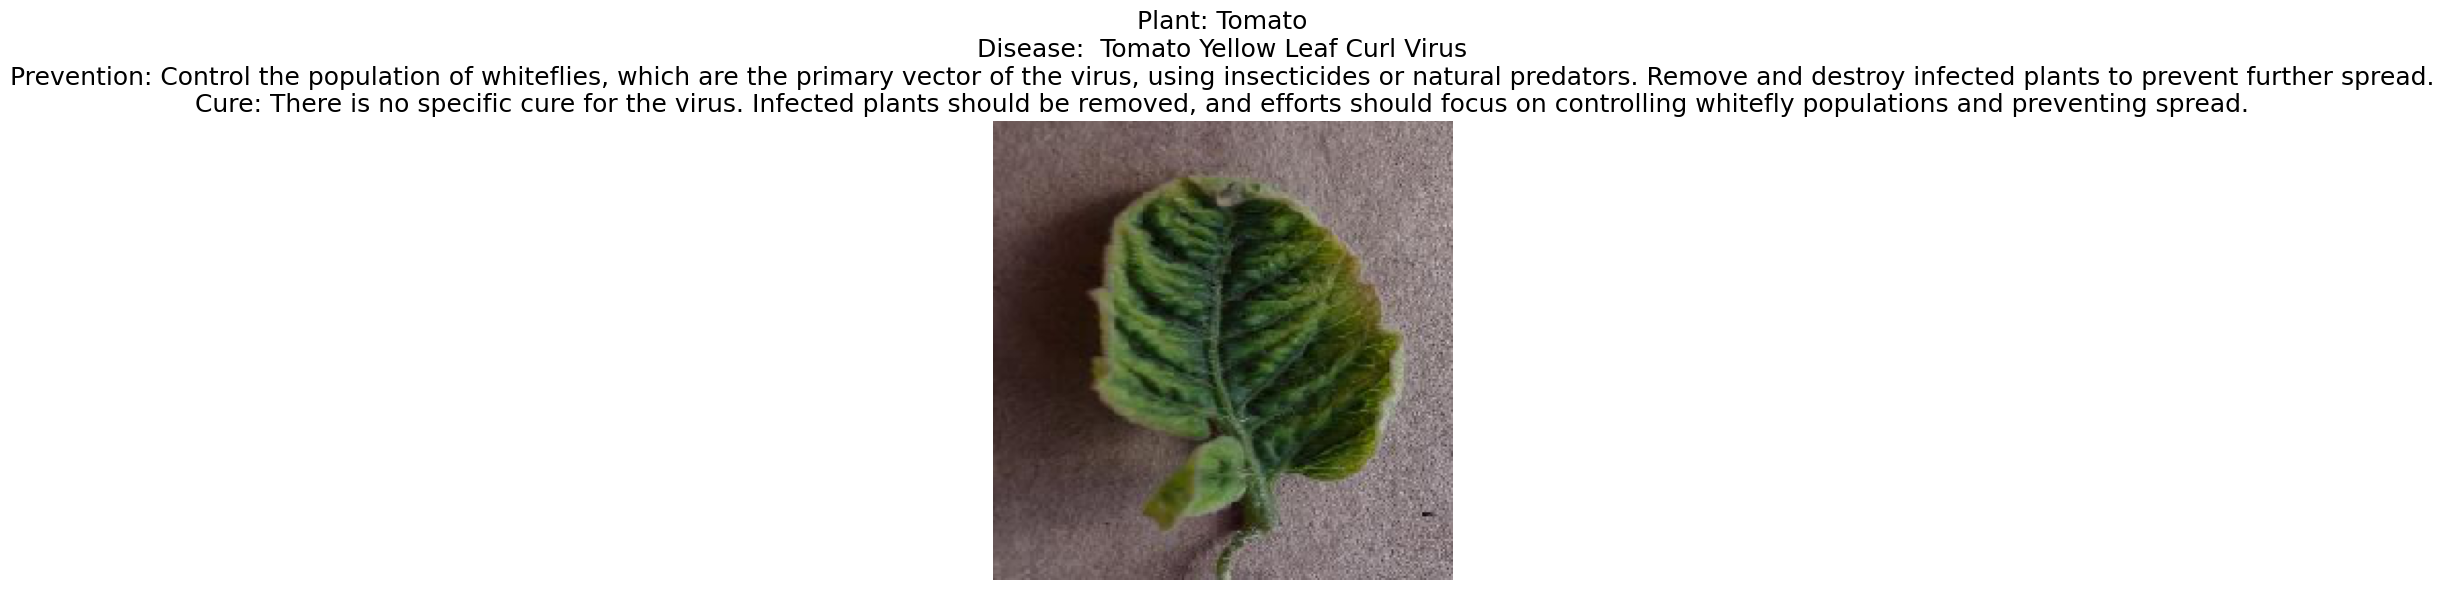

In [155]:
# Plot the image with the predicted class, disease, prevention, and cure information
plt.figure(figsize=(6, 6))
plt.imshow(new_img)
plt.title(f"Plant: {plant_name}\nDisease: {disease_name}\nPrevention: {prevention}\nCure: {cure}", fontsize=18)
plt.axis('off')
plt.tight_layout()  # Ensures everything fits within the figure area
plt.show()

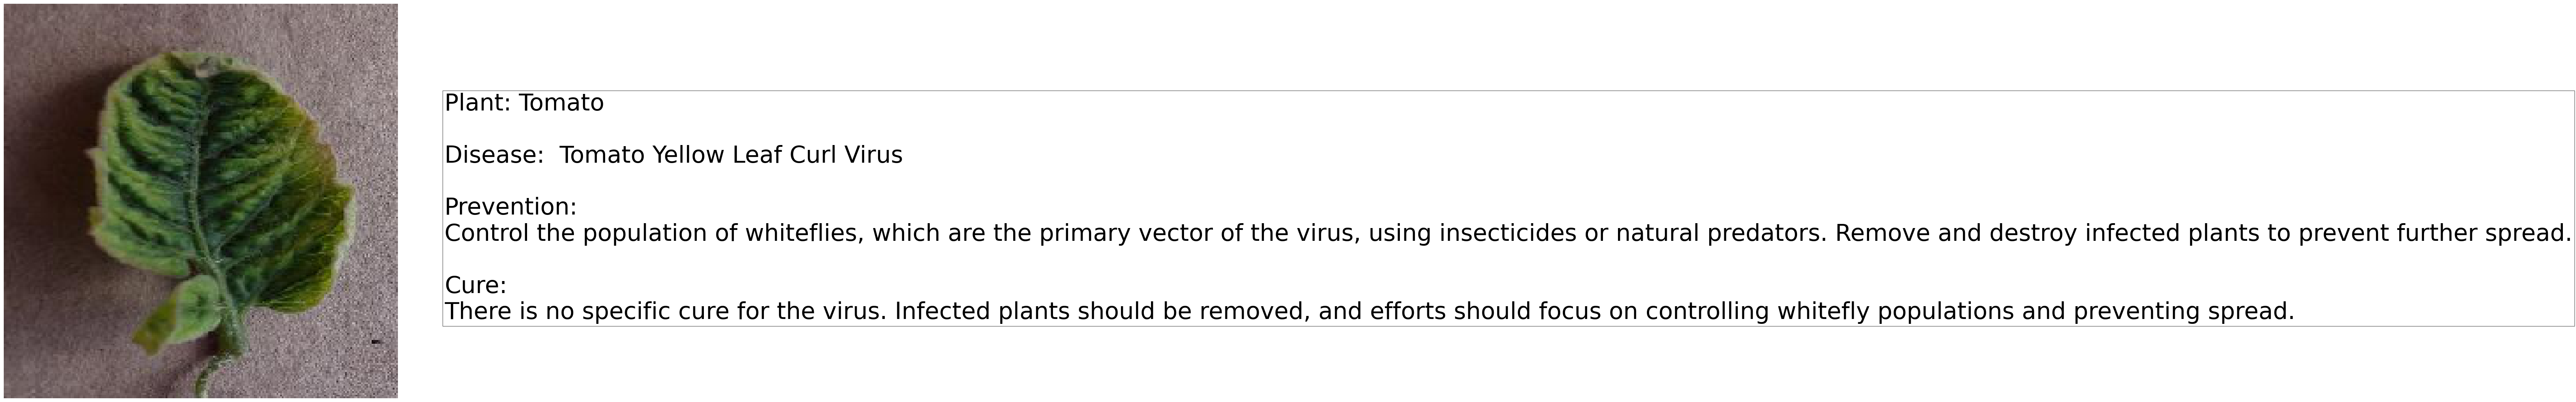

In [157]:
# Plot the image with the predicted class, disease, prevention, and cure information
plt.figure(figsize=(15, 15))  # Set a larger figure size to accommodate text
plt.imshow(new_img)
plt.axis('off')

# Add the text to the left of the image
text_str = f"Plant: {plant_name}\n\nDisease: {disease_name}\n\nPrevention:\n{prevention}\n\nCure:\n{cure}"
plt.text(250, 50, text_str, fontsize=45, verticalalignment='top', horizontalalignment='left',
         bbox=dict(facecolor='white', alpha=0.6))

# Manually adjust layout to avoid clipping text
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1)

plt.show()

In [137]:
# Save the entire model
classifier.save('plant_disease_classifier_model.h5')

# To load the saved model later, use:
from tensorflow.keras.models import load_model
loaded_model = load_model('plant_disease_classifier_model.h5')

In [141]:
# Save only the model weights (with correct file extension)
classifier.save_weights('plant_disease_classifier_model.weights.h5')

# To load the weights into the same model architecture later:
classifier.load_weights('plant_disease_classifier_model.weights.h5')

In [159]:
from tensorflow.keras.models import load_model

# Load the entire saved model
loaded_model = load_model('plant_disease_classifier_model.h5')

In [161]:
# Define the same model architecture
# (Use the same architecture as when you trained it)
classifier = Sequential()
# Add your model layers here, matching the original architecture

# Load the saved weights
classifier.load_weights('plant_disease_classifier_model.weights.h5')


In [163]:
# Define the same model architecture
# (Use the same architecture as when you trained it)
classifier = Sequential()
# Add your model layers here, matching the original architecture

# Load the saved weights
classifier.load_weights('plant_disease_classifier_model.weights.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Predicted class: Corn_(maize)___Common_rust_


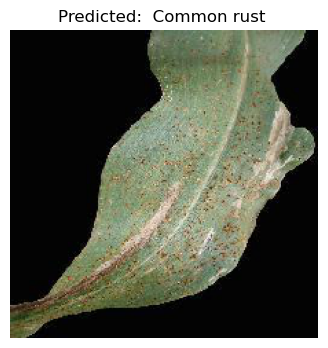

In [165]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the test image
image_path = 'Desktop/DESPU/plant/test/test/CornCommonRust1.JPG'  # Replace with the path to your test image

# Preprocess the image (resize and scale it appropriately)
new_img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(new_img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

# Make a prediction
prediction = loaded_model.predict(img_array)  # or 'classifier' if using weights
predicted_class = np.argmax(prediction[0])

# Get the class labels
class_dict = train_generator.class_indices  # Make sure you have this from your training data
class_labels = list(class_dict.keys())

# Fetch the predicted class label
predicted_label = class_labels[predicted_class]
print(f"Predicted class: {predicted_label}")

# Plot the image with the predicted class
plt.figure(figsize=(4, 4))
plt.imshow(new_img)
plt.title(f"Predicted: {predicted_label.split('__')[1].replace('_', ' ')}")
plt.axis('off')
plt.show()

In [169]:
# Get prevention and cure information
prevention, cure = get_prevention_cure(predicted_label)

# Output the results
print(f"Prevention: {prevention}")
print(f"Cure: {cure}")

Prevention: Plant rust-resistant varieties and practice crop rotation to avoid continuous planting of corn in the same field. Remove and destroy infected leaves to minimize spread. Ensure proper irrigation management, as rust thrives in wet conditions.
Cure: Use fungicides such as those containing copper or mancozeb to control the spread of rust. Apply early at the first sign of infection, especially during wet periods.


##### STEP 10: MODEL EVALUATION

In [167]:
# Evaluate on the validation or test set
loss, accuracy = loaded_model.evaluate(validation_generator)  # Or 'classifier' if using weights
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 24s 214ms/step - accuracy: 0.8951 - loss: 0.3217
Validation Loss: 0.32434365153312683
Validation Accuracy: 0.8915215730667114


##### STEP 11: SAVING & LOADING THE MODEL

In [ ]:
classifier.save('plant_disease_classifier_model.h5')

from tensorflow.keras.models import load_model
loaded_model = load_model('plant_disease_classifier_model.h5')

In [ ]:
classifier.save_weights('plant_disease_classifier_model.weights.h5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('plant_disease_classifier_model.h5')

In [ ]:
classifier = Sequential()
classifier.load_weights('plant_disease_classifier_model.weights.h5')